In [181]:
import numpy as np 
import pandas as pd 
import requests
import os 


### Get Data from The Star Wars API (https://swapi.dev/documentation)

In [182]:
url = 'http://swapi.dev/api/'

In [183]:
response = requests.get(os.path.join(url, 'people/'))

In [184]:
data = response.json()

In [185]:
data['count']

82

There are 83  people in `people` collection

In [186]:
data.keys()

dict_keys(['count', 'next', 'previous', 'results'])

Results for Luke Skywalker

In [187]:
data['results'][0]

{'name': 'Luke Skywalker',
 'height': '172',
 'mass': '77',
 'hair_color': 'blond',
 'skin_color': 'fair',
 'eye_color': 'blue',
 'birth_year': '19BBY',
 'gender': 'male',
 'homeworld': 'http://swapi.dev/api/planets/1/',
 'films': ['http://swapi.dev/api/films/1/',
  'http://swapi.dev/api/films/2/',
  'http://swapi.dev/api/films/3/',
  'http://swapi.dev/api/films/6/'],
 'species': [],
 'vehicles': ['http://swapi.dev/api/vehicles/14/',
  'http://swapi.dev/api/vehicles/30/'],
 'starships': ['http://swapi.dev/api/starships/12/',
  'http://swapi.dev/api/starships/22/'],
 'created': '2014-12-09T13:50:51.644000Z',
 'edited': '2014-12-20T21:17:56.891000Z',
 'url': 'http://swapi.dev/api/people/1/'}

In [188]:
people = [requests.get('https://swapi.dev/api/people/' + str(i)).json() for i in range(1, 84)]

In [10]:
#normalize json 
df = pd.json_normalize(people)

In [11]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,detail
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],"[http://swapi.dev/api/vehicles/14/, http://swa...","[http://swapi.dev/api/starships/12/, http://sw...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/,NaN
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[http://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,http://swapi.dev/api/people/2/,NaN
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,http://swapi.dev/api/planets/8/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[http://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,http://swapi.dev/api/people/3/,NaN
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],[],[http://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,http://swapi.dev/api/people/4/,NaN
4,Leia Organa,150,49,brown,light,brown,19BBY,female,http://swapi.dev/api/planets/2/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],[http://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,http://swapi.dev/api/people/5/,NaN


## Show the name of the oldest person (or robot or alien) and list the titles of all the films they appeared in

### Find the oldest character in the Star Wars Universe

In [133]:
# susbet data
subset = df[['name', 'birth_year', 'films']]
subset.head()

,name,birth_year,films
0,Luke Skywalker,19BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."
1,C-3PO,112BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."
2,R2-D2,33BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."
3,Darth Vader,41.9BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."
4,Leia Organa,19BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."


In [134]:
#remove observations with 'uknown' years 
subset = subset[subset.birth_year != 'unknown']
subset[15:17]

,name,birth_year,films
16,NaN,NaN,NaN
17,Wedge Antilles,21BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."


In [138]:
#remove a record with missing data 
subset = subset.drop(16).reset_index(drop = True)

In [139]:
subset.shape

(43, 3)

According to th edocumentation, `birth_year` is 'the birth year of the person, using the in-universe standard of BBY or ABY - Before the Battle of Yavin or After the Battle of Yavin. The Battle of Yavin is a battle that occurs at the end of Star Wars episode IV: A New Hope.'

Let's check if we have characters from both periods. 

In [140]:
subset.birth_year.str.contains('BBY').sum()

43

It seems that all characters were born Before the Battle of Yavin (BBY)

In [142]:
subset.head()

,name,birth_year,films
0,Luke Skywalker,19BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."
1,C-3PO,112BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."
2,R2-D2,33BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."
3,Darth Vader,41.9BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."
4,Leia Organa,19BBY,"[http://swapi.dev/api/films/1/, http://swapi.d..."


In [143]:
#Extract year from birth_year column and save it as DataFrame 'year'. 
year = pd.DataFrame(subset.birth_year.str.extractall(r'(\d+.\d+|\d+)').astype(float)) 
year = year.droplevel(1)
year.columns = ['year']
year.head()

,year
0,19.0
1,112.0
2,33.0
3,41.9
4,19.0


In [144]:
#Concatenate subset and year dataframes 
subset = pd.concat((subset,year), axis = 1)

In [145]:
subset.head()

,name,birth_year,films,year
0,Luke Skywalker,19BBY,"[http://swapi.dev/api/films/1/, http://swapi.d...",19.0
1,C-3PO,112BBY,"[http://swapi.dev/api/films/1/, http://swapi.d...",112.0
2,R2-D2,33BBY,"[http://swapi.dev/api/films/1/, http://swapi.d...",33.0
3,Darth Vader,41.9BBY,"[http://swapi.dev/api/films/1/, http://swapi.d...",41.9
4,Leia Organa,19BBY,"[http://swapi.dev/api/films/1/, http://swapi.d...",19.0


In [146]:
oldest  = subset[subset.year == max(subset.year)]
oldest

,name,birth_year,films,year
16,Yoda,896BBY,"[http://swapi.dev/api/films/2/, http://swapi.d...",896.0


In [180]:
youngest = subset[subset.year == min(subset.year)]
youngest

,name,birth_year,films,year
25,Wicket Systri Warrick,8BBY,[http://swapi.dev/api/films/3/],8.0


In [179]:
print(f'The oldest charecter is {oldest.name.values[0]} who was born in {oldest.year.values[0]} BBY. \nAnd the youngest character is {youngest.name.values[0]} who was born in {youngest.year.values[0]} BBY.')

The oldest charecter is Yoda who was born in 896.0 BBY. 
And the youngest character is Wicket Systri Warrick who was born in 8.0 BBY.


### Find the films that the Yoda appeared in 

In [178]:
#the following list comprehension pulls the data from API for each URL in the films column, converts it to JSON format, 
#and pulls the title of the movie. 
[j['title'] for j in [requests.get(i).json() for i in subset.films[oldest.index.values[0]]]]

['The Empire Strikes Back',
 'Return of the Jedi',
 'The Phantom Menace',
 'Attack of the Clones',
 'Revenge of the Sith']

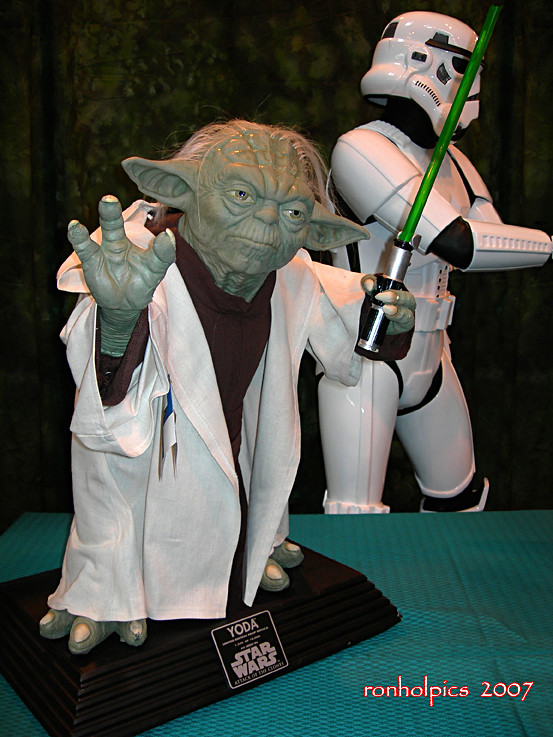

In [190]:
from IPython.display import Image
Image(filename = 'img/yoda.jpg')